In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('trainbase.csv')
df_test = pd.read_csv('testbase.csv')

In [3]:
df_train.head()

,id,creditlimit,n_cards,os_balance,os_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,branchcode,rasio_pembayaranpayment_ratio,...,good_bad_flag,loan_tenure,total_trx,remaining_statement_balance_per_n_cards,remaining_statement_balance_per_limit,total_trx_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_Rate_3months,utilization_Rate_6months
0,20210100001,7000000.0,2,36158,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,20210100002,10000000.0,2,268691,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,20210100003,28000000.0,3,6769149,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,20210100004,21000000.0,4,3496732,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,20210100005,10000000.0,2,9402085,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [4]:
#the id column is not useful for us and building a model then we must drop it

df_train.drop(columns='id', inplace = True)
df_test.drop(columns='id', inplace = True)

Lets get more data from our columns by df.info()

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13170 entries, 0 to 13169
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   creditlimit                              13170 non-null  float64
 1   n_cards                                  13170 non-null  int64  
 2   os_balance                               13170 non-null  int64  
 3   os_billing                               13170 non-null  float64
 4   tot_cash_advance_trx                     13170 non-null  float64
 5   tot_retail_trx                           13170 non-null  float64
 6   remaining_unpaid_balance                 13170 non-null  float64
 7   branchcode                               13084 non-null  object 
 8   rasio_pembayaranpayment_ratio            13170 non-null  float64
 9   overlimit_pct                            13170 non-null  float64
 10  payment_ration_3months                   13170

In [8]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
creditlimit,13170.0,2.070004e+07,2.957703e+07,3.000000e+06,5.000000e+06,9.000000e+06,2.200000e+07,1.000000e+09
n_cards,13170.0,2.503493e+00,1.012502e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.600000e+01
os_balance,13170.0,1.160585e+07,2.378763e+07,0.000000e+00,1.998926e+06,4.705553e+06,1.064840e+07,7.980586e+08
os_billing,13170.0,8.115265e+06,1.771476e+07,2.004300e+04,8.147260e+05,3.154396e+06,7.464537e+06,6.280000e+08
tot_cash_advance_trx,13170.0,7.273773e+04,5.812124e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.873341e+07
tot_retail_trx,13170.0,2.006182e+06,7.723783e+06,-1.566720e+07,0.000000e+00,2.040815e+05,1.412833e+06,2.850000e+08
remaining_unpaid_balance,13170.0,8.181807e+06,1.925655e+07,0.000000e+00,0.000000e+00,2.753848e+06,7.185789e+06,4.440000e+08
rasio_pembayaranpayment_ratio,13170.0,6.579761e+01,8.554434e+02,-1.813800e+04,0.000000e+00,2.660000e+01,1.000000e+02,6.898300e+04
overlimit_pct,13170.0,3.363252e+00,9.175405e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.240000e+00,1.900000e+02
payment_ration_3months,13170.0,5.378760e+01,1.354152e+03,-5.779234e+04,1.990500e+01,5.000000e+01,9.095500e+01,7.557500e+04


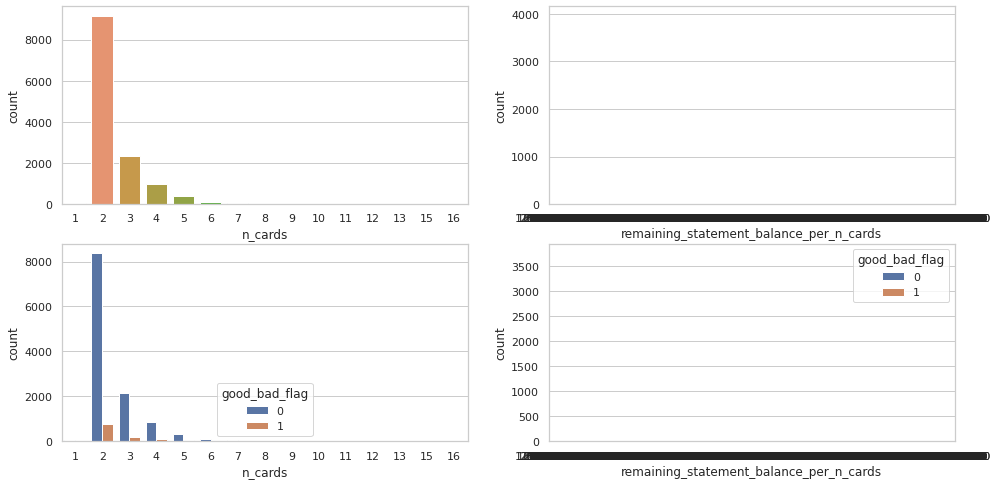

In [9]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'n_cards' , data = df_train)
plt.subplot(2,2,2)
sns.countplot(x = 'remaining_statement_balance_per_n_cards', data= df_train)
plt.subplot(2,2,3)
sns.countplot(x = 'n_cards', hue= 'good_bad_flag', data = df_train)
plt.subplot(2,2,4)
sns.countplot(x = 'remaining_statement_balance_per_n_cards',hue = 'good_bad_flag' , data= df_train)
plt.show()

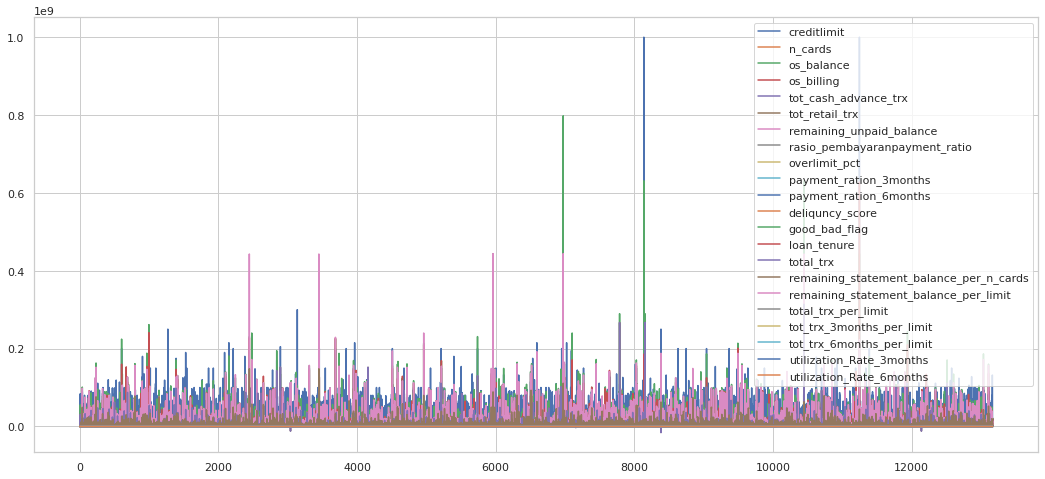

In [10]:
df_train.plot(figsize=(18, 8))
plt.show()

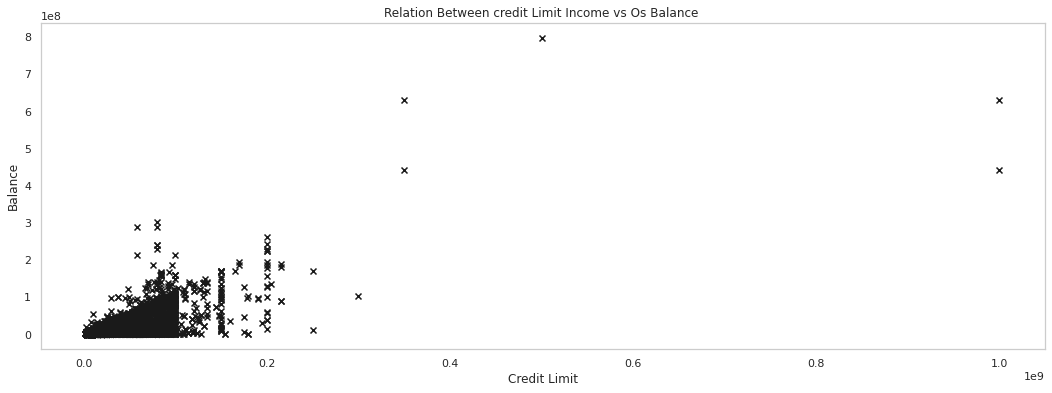

In [11]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between credit Limit Income vs Os Balance ")

plt.grid()
plt.scatter(df_train['creditlimit'] , df_train['os_balance'], c='k', marker='x')
plt.xlabel("Credit Limit")
plt.ylabel("Balance")
plt.show()

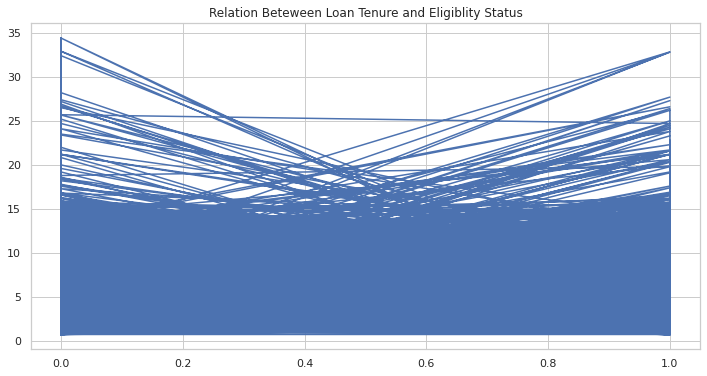

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df_train['good_bad_flag'], df_train['loan_tenure'])
plt.title("Relation Beteween Loan Tenure and Eligiblity Status")
plt.show()

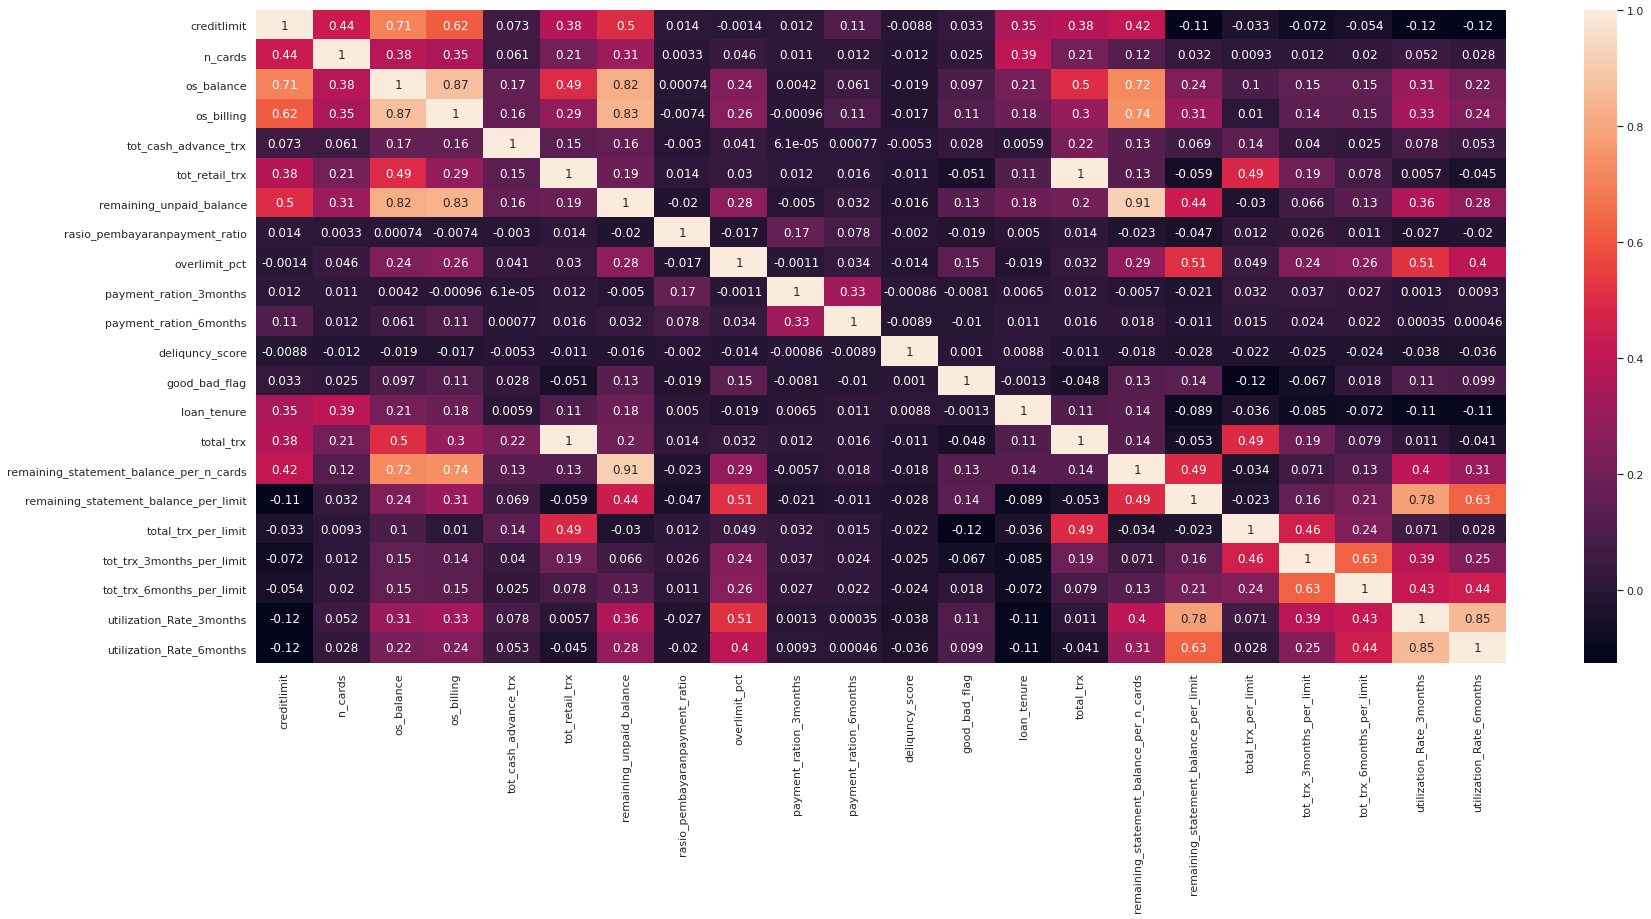

In [18]:
corr = df_train.corr()
plt.figure(figsize=(28,12))
sns.heatmap(corr , annot = True )
plt.show()

In this heatmap, we can clearly seen the relation between two variables

### Choose ML Model

In this step, We have a lots of Machine Learning Model from sklearn package, and we need to decide which model is give us the better performance. then we use that model in final stage and send to the production level.

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

First of all, we are use LogisticRegression from sklearn.linear_model package. Here is the little information about LogisticRegression.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, and True / False) given a set of independent variables. To represent binary / categorical outcome, we use dummy variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable.

In [29]:
logistic_model = LogisticRegression()

### Traing the ML Model
Before fitting the model, We need to decide how many feature are available for testing and training, then after complete this step. fitt the model
Currently, we are using loan_tenure', 'creditlimit', 'os_balance features for training so let's create train and test variables

In [30]:
train_features = ['creditlimit', 'os_balance', 'loan_tenure']

In [35]:
x_train = df_train[train_features].values
y_train = df_train['good_bad_flag'].values

x_test = df_train[train_features].values



In [36]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

### Predict Model

In [37]:
predicted = logistic_model.predict(x_test)

In [38]:
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[-1.15427587e-07  4.85746041e-08 -8.42797758e-13]]


In [39]:
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.69057377e-13]


In [40]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.9117691723614275
accuracy_score percent : 91.18


In [41]:
# predict the target on the test dataset
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [0 0 0 ... 0 0 0]


### Deploy Model

Finally, we are done so far. The last step is to deploy our model in production map. Suppose we need to export our model and bind with web application API.
Using pickle we can export our model and store in to logistic_model.pkl file, so we can ealy access this file and calculate customize prediction using Web App API.

A little bit information about pickle:¶
Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions

In [43]:
import pickle as pkl

In [44]:
# save the model to disk
filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary
